# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 9

## Problem 1  

We must read in the data from the datafile, Chapter\_9/zijd\_example.dat, convert the vectors to x,y,z and plot them as a Zijderveld diagram.  
First let's read in the data as pandas DataFrame.

In [1]:
import pandas as pd
# read in the data into a pandas frame with the first line as a header
data = pd.read_csv('Chapter_9/zijd_example.csv',header=0)
print (data.head())

  Specimen  Treat       Int    Dec   Inc
0    ex9-1     20  0.004199  186.1  -2.3
1    ex9-1    150  0.004834  188.6 -14.8
2    ex9-1    250  0.005453  189.8 -23.4
3    ex9-1    350  0.005978  191.1 -27.1
4    ex9-1    450  0.006400  192.1 -30.8


Re-use our old code dir2cart from Chapter 2.  

In [2]:
import numpy as np
def dir2cart(data):
    """ Converts data array with [Declination, Inclination, Intensity] 
        to cartesian coordinates, X=North, Y=East, Z=Down
        Returns array with [X,Y,Z]
    """
    # convert degrees to radians for declination and inclination
    decs,incs,ints=np.radians(data[0]),np.radians(data[1]),data[2]
    X=ints*np.cos(decs)*np.cos(incs)
    Y=ints*np.sin(decs)*np.cos(incs)
    Z=ints*np.sin(incs)
    cart=np.array([X,Y,Z]).transpose()
    return cart

Now we plot X (N) versus -Y (W) as solid red symbols and X versus -Z (Up) as open squares. Zijderveld diagrams have equal axis calibrations, so we also need to make sure that happens... 

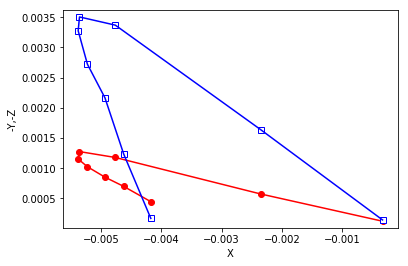

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# send the vectors to dir2cart
cart = dir2cart([data['Dec'],data['Inc'],data['Int']]).transpose()
# plot the cartesian coordinates
plt.plot(cart[0],-cart[1],'ro',cart[0],-cart[1],'r-')
plt.plot(cart[0],-cart[2],'ws',cart[0],-cart[2],'b-',markeredgecolor='b')
plt.xlabel('X')
plt.ylabel('-Y,-Z')
plt.axis('equal');

## Problem 1b

First let's find out about ipmag.zeq ..... 

In [1]:
import pmagpy.ipmag as ipmag

In [2]:
help(ipmag.zeq)

Help on function zeq in module pmagpy.ipmag:

zeq(path_to_file='.', file='', data='', units='U', calculation_type='DE-BFL', save=False, save_folder='.', fmt='svg', begin_pca='', end_pca='', angle=0)
    NAME
       zeq.py
    
    DESCRIPTION
       plots demagnetization data for a single specimen:
          - The solid (open) symbols in the Zijderveld diagram are X,Y (X,Z) pairs.  The demagnetization diagram plots the
          fractional remanence remaining after each step. The green line is the fraction of the total remaence removed
          between each step.  If the principle direction is desired, specify begin_pca and end_pca steps as bounds for calculation.
    
          -The equal area projection has the X direction (usually North in geographic coordinates)
          to the top.  The red line is the X axis of the Zijderveld diagram.  Solid symbols are lower hemisphere.
    
          - red dots and blue line is the remanence remaining after each step.  The green line is the p

Ahhhh..  so I just set the path, file, units, save and format flags (if desired): 


ex9-1
step treat  intensity  dec    inc
0     20.0 4.199e-03   186.1    -2.3 


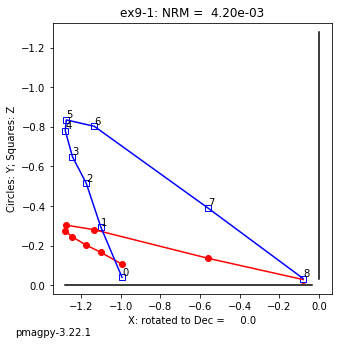

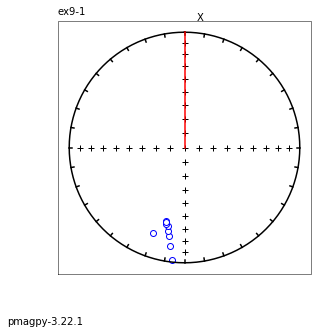

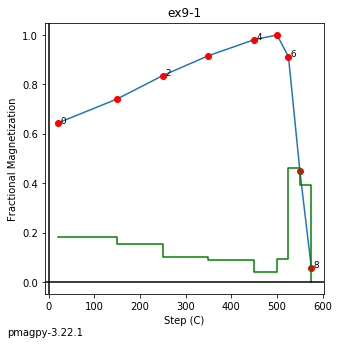

1    150.0 4.834e-03   188.6   -14.8 


2    250.0 5.453e-03   189.8   -23.4 


3    350.0 5.978e-03   191.1   -27.1 


4    450.0 6.400e-03   192.1   -30.8 


5    500.0 6.525e-03   193.4   -32.5 


6    525.0 5.950e-03   193.9   -34.5 


7    550.0 2.927e-03   193.7   -34.1 


8    575.0 3.830e-04   200.1   -22.0 


In [3]:
ipmag.zeq(path_to_file='Chapter_9',file='zijd_example.txt', units='C')


## Problem 1c

It looks like there is a North and Downward directed low temperature component (VRM in present field?) and a south and upward directed characteristic component.  

## Problem 1d
Now I want to fit a line through points 5 to 8 and then again a plane through all the points.  First the line: 

ex9-1
step treat  intensity  dec    inc
0     20.0 4.199e-03   186.1    -2.3 


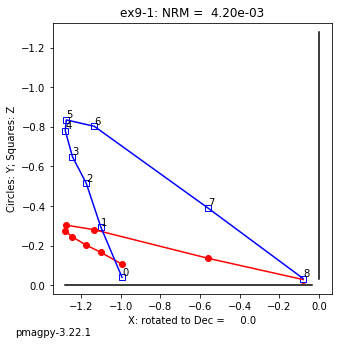

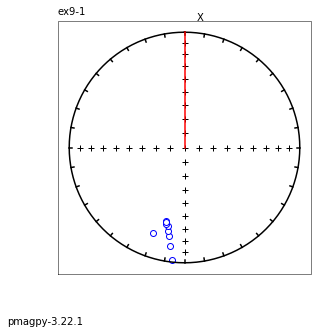

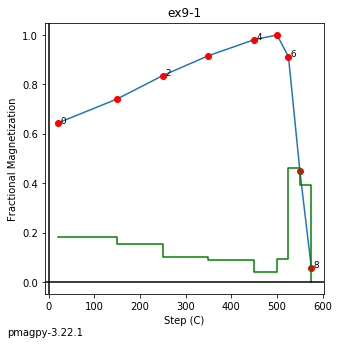

1    150.0 4.834e-03   188.6   -14.8 


2    250.0 5.453e-03   189.8   -23.4 


3    350.0 5.978e-03   191.1   -27.1 


4    450.0 6.400e-03   192.1   -30.8 


5    500.0 6.525e-03   193.4   -32.5 


6    525.0 5.950e-03   193.9   -34.5 


7    550.0 2.927e-03   193.7   -34.1 


8    575.0 3.830e-04   200.1   -22.0 


Specimen, calc_type, N, min, max, MAD, dec, inc
ex9-1 DE-BFL 4  500.00 575.00    2.0   193.2   -33.9


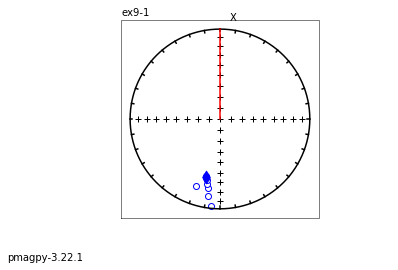

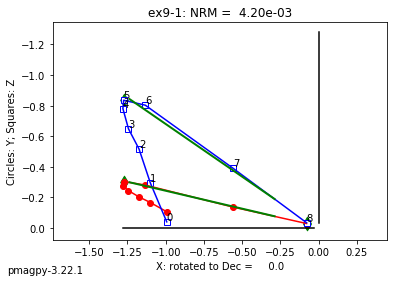

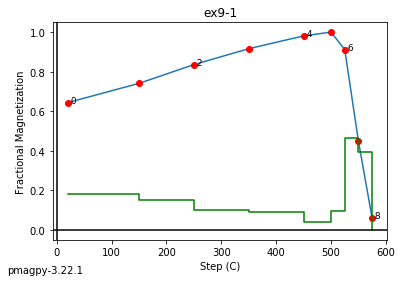

In [4]:
ipmag.zeq(path_to_file='Chapter_9',file='zijd_example.txt', units='C', fmt='png',begin_pca=5,end_pca=8)

The approximate direction of the low stability component is (assuming for the moment that these are geographic coordinates), we have a northeast and down low stability component and an a southeast and up high stability component.   The magnetization is pretty much "dead" by 575$^{\circ}$C, quite close to the Curie Temperature of magnetite, so we guess "magnetite" as a remanence carrier.  


And now the plane through all the points - and I want to look at the equal area projection instead of the Zijderveld plot. 

ex9-1
step treat  intensity  dec    inc
0     20.0 4.199e-03   186.1    -2.3 


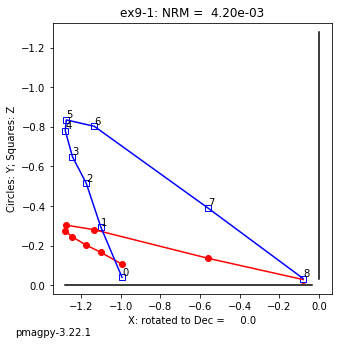

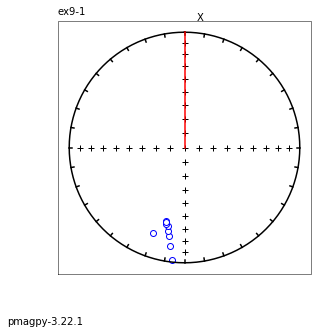

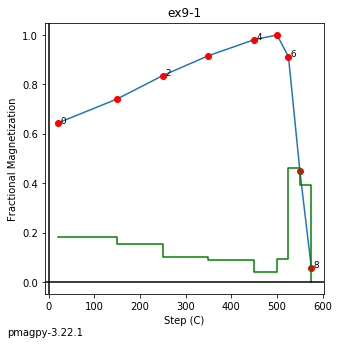

1    150.0 4.834e-03   188.6   -14.8 


2    250.0 5.453e-03   189.8   -23.4 


3    350.0 5.978e-03   191.1   -27.1 


4    450.0 6.400e-03   192.1   -30.8 


5    500.0 6.525e-03   193.4   -32.5 


6    525.0 5.950e-03   193.9   -34.5 


7    550.0 2.927e-03   193.7   -34.1 


8    575.0 3.830e-04   200.1   -22.0 


Specimen, calc_type, N, min, max, MAD, dec, inc
ex9-1 DE-BFP 9   20.00 575.00   15.9   276.5    11.6


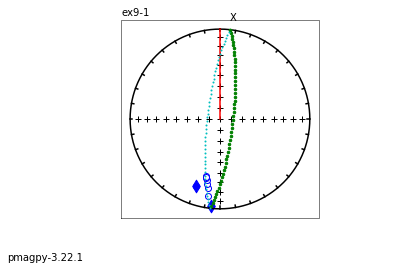

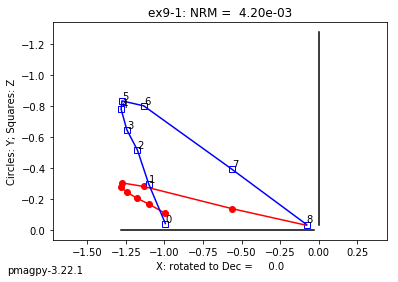

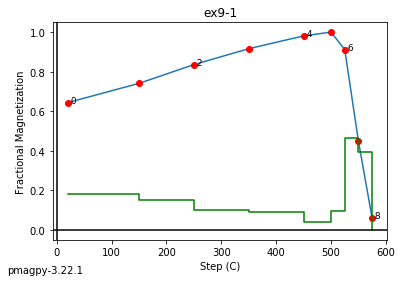

In [5]:
ipmag.zeq(path_to_file='Chapter_9',file='zijd_example.txt', units='C', fmt='png',begin_pca=0,end_pca=8,\
          calculation_type="DE-BFP")

The great circle interpretation makes the most sense, because the second component really only has three demagnetization steps and is not very well defined.  To acquire a VRM with a laboratory blocking temperature of 500$^{\circ}$ held by magnetite over a million year interval, the rock must have been held at $\sim400^{\circ}$, using Figure 7.22.  

## Problem 2


We do this problem by calling  the function **pmag.dosundec**  after importing the module pmag.py.

In [10]:
import pmagpy.pmag as pmag
help(pmag.dosundec)

Help on function dosundec in module pmagpy.pmag:

dosundec(sundata)
    returns the declination for a given set of suncompass data
    Parameters
    __________
      sundata : dictionary with these keys:
          date: time string with the format 'yyyy:mm:dd:hr:min'
          delta_u: time to SUBTRACT from local time for Universal time
          lat: latitude of location (negative for south)
          lon: longitude of location (negative for west)
          shadow_angle: shadow angle of the desired direction with respect to the sun.
    Returns
    ________
       sunaz : the declination of the desired direction wrt true north.



So we just fill in the sundata dictionary with the desired numbers and call pmag.dosundec.

In [11]:
sundata={'date':'1994:05:23:16:09','delta_u':3,'lat':35,'lon':33,'shadow_angle':68}
print ('%7.1f'%(pmag.dosundec(sundata)))

  154.2


## Problem 3a

This problem is challenging. First do the problem "by hand" using a stereonet.  You can check your answer with the PmagPy program di_tilt.py on the command line:

$ di_tilt.py -i

_Declination: <cntl-D> to quit_ 336

_Inclination:_ -2

_Dip direction:_ 351

_Dip: 41_

  330.9   -41.3
  

## Problem 3b

Let's try this one by called the function pmag.dotilt(dec,inc,bed_az,bed_dip).  

In [12]:
help(pmag.dotilt)

Help on function dotilt in module pmagpy.pmag:

dotilt(dec, inc, bed_az, bed_dip)
    Does a tilt correction on a direction (dec,inc) using bedding dip direction
    and bedding dip.
    
    Parameters
    ----------
    dec : declination directions in degrees
    inc : inclination direction in degrees
    bed_az : bedding dip direction
    bed_dip : bedding dip
    
    Returns
    -------
    dec,inc : a tuple of rotated dec, inc values
    
    Examples
    -------
    >>> pmag.dotilt(91.2,43.1,90.0,20.0)
    (90.952568837153436, 23.103411670066617)



In [43]:
print ('%7.1f %7.1f'%(pmag.dotilt(336,-2,351,41)))

  330.9   -41.3


## Problem 4

(from Robert Butler):  To unplunge the fold, we must rotate the fold axis to horizontal. This is
done by rotating about a horizontal axis which is 90° from the trend of the
fold axis; at azimuth 260° in this case. The NRM direction and the pole to
bedding are rotated by 20° about this axis as shown below. The resulting
NRM direction corrected for plunge is: I=47°; D=297°. The pole to bedding
corrected for plunge is: I=68°; D=260°.   

Using our **pmag.dotilt** function, it looks like this:

In [13]:
help(pmag.dotilt)

Help on function dotilt in module pmagpy.pmag:

dotilt(dec, inc, bed_az, bed_dip)
    Does a tilt correction on a direction (dec,inc) using bedding dip direction
    and bedding dip.
    
    Parameters
    ----------
    dec : declination directions in degrees
    inc : inclination direction in degrees
    bed_az : bedding dip direction
    bed_dip : bedding dip
    
    Returns
    -------
    dec,inc : a tuple of rotated dec, inc values
    
    Examples
    -------
    >>> pmag.dotilt(91.2,43.1,90.0,20.0)
    (90.952568837153436, 23.103411670066617)



In [14]:
dec,inc=309,33  # declination and inclination of direction
bed_az,bed_dip=120,29 # bedding dip direction and dip
bed_pole_az=bed_az+180 # azimuth of  bedding pole 
bed_pole_dip=90.-bed_dip # azimuth of bedding dip
trend,plunge=170,20
# first correct the bed_pole_az, bed_pole_dip, dec, inc for the trend and plunge:
bed_pole_az_corr,bed_pole_dip_corr=pmag.dotilt(bed_pole_az,bed_pole_dip,trend,plunge)
dec_corr,inc_corr=pmag.dotilt(dec,inc,trend,plunge)
print ('plunge corrected bedding pole azimuth and dip: ,%7.1f %7.1f'%(bed_pole_az_corr,bed_pole_dip_corr))
print ('plunge corrected declination inclination: ,%7.1f %7.1f'%(dec_corr,inc_corr))


plunge corrected bedding pole azimuth and dip: ,  259.0    68.2
plunge corrected declination inclination: ,  296.6    46.7


To complete the structural correction, we must rotate the NRM direction
while restoring the beds to horizontal about the bedding strike (corrected
for plunge). The pole to bedding is I=68°; D=260°. So the dip is 22° and
strike is 170°. Rotating the plunge corrected NRM direction about this
strike line (as shown below) yields NRM direction: I=62°; D=320°.

Using **pmag.dotilt**, we get:


In [45]:
# first fine the bedding dip direction and dip from the pole to the bed
# (corrected for plunge)
# remember that bedding dip direction is at right angles to the strike
bed_az_corr,bed_dip_corr= bed_pole_az_corr-180.,90.-bed_pole_dip_corr
print ('%7.1f %7.1f'%(bed_az_corr,bed_dip_corr))
# now plug these numbers into pmag.dotilt to get the tilt and plunge corrected values.
print ('plunge and tilt corrected values: %7.1f %7.1f'%(pmag.dotilt(dec_corr,inc_corr,bed_az_corr,bed_dip_corr)))

   79.0    21.8
plunge and tilt corrected values:   319.8    61.4


## Problem 5

Here is a function that will do the geographic correction:

In [46]:
def dogeo(dec,inc,az,pl):
    A1,A2,A3=[],[],[] # set up lists for rotation vector
    Dir=[dec,inc,1.] # put dec inc in direction list and set  length to unity
    X=dir2cart(Dir) # get cartesian coordinates
#
#   set up rotation matrix
#
    A1=dir2cart([az,pl,1.])
    A2=dir2cart([az+90.,0,1.])
    A3=dir2cart([az-180.,90.-pl,1.])
#
# do rotation
#
    xp=A1[0]*X[0]+A2[0]*X[1]+A3[0]*X[2]
    yp=A1[1]*X[0]+A2[1]*X[1]+A3[1]*X[2]
    zp=A1[2]*X[0]+A2[2]*X[1]+A3[2]*X[2]
#
# transform back to dec,inc
#
    Dir_geo=pmag.cart2dir([xp,yp,zp])
    return Dir_geo[0],Dir_geo[1] # return the corrected dec and inc


which we can call here:

In [47]:
dec,inc,az,pl = 8.1,45.2, 347 ,27
dec_geo,inc_geo=dogeo(dec,inc,az,pl)
print ('%7.1f %7.1f'%(dec_geo,inc_geo))

    5.3    71.6


And here is one for doing tilt corrections: 

In [51]:
def dotilt(dec,inc,bed_az,bed_dip):
    # this calls functions from the pmag module that we have already written in previous 
    # homework problems.   you can use these, or use your own! 
    X=pmag.dir2cart([dec,inc,1.]) # get cartesian coordinates of dec,inc
# get some sines and cosines of new coordinate system
    sa,ca= -np.sin(np.radians(bed_az)),np.cos( np.radians(bed_az))
    cdp,sdp= np.cos(np.radians(bed_dip)),np.sin(np.radians(bed_dip))
# do the rotation
    xc=X[0]*(sa*sa+ca*ca*cdp)+X[1]*(ca*sa*(1.-cdp))+X[2]*sdp*ca
    yc=X[0]*ca*sa*(1.-cdp)+X[1]*(ca*ca+sa*sa*cdp)-X[2]*sa*sdp
    zc=X[0]*ca*sdp-X[1]*sdp*sa-X[2]*cdp
# convert back to direction:
    Dir=pmag.cart2dir([xc,yc,-zc])
    return Dir[0],Dir[1] # return declination, inclination of rotated direction


Let's take the geographically corrected dec and inc from before and plug it in:

In [52]:
bed_az,bed_dip=225.,21. # add 90 to strike to get bedding dip direction. 
dec_tilt,inc_tilt=dotilt(dec_geo,inc_geo,bed_az,bed_dip)
print ('%7.1f %7.1f'%(dec_geo,inc_geo))

    5.3    71.6


## Problem 6

Just follow the instructions in the problem set.  